# Stochastic Gradient descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

(10000, 1)


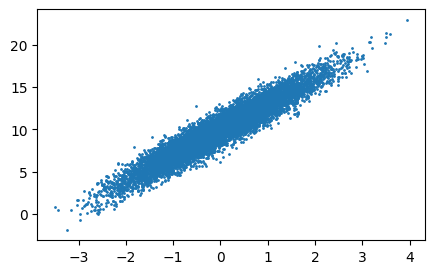

In [2]:
m = 10000
X = np.random.randn(m,1)
print(X.shape)
y = 3*X + np.random.randn(m,1) + 10

fig, ax = plt.subplots(1, figsize=(5,3))
plt_obj = plt.scatter(X, y, s=1)
plt.show()

## Batch Gradient Desdent as Benchmark

In [3]:
%run gradient_descent
from gradient_descent import BatchGradientDescent
from gradient_descent import StochasticGradientDescent

In [4]:
eta = 0.1
epsilon = 0.0001

batch_gd = BatchGradientDescent(eta=eta, epsilon=epsilon, mult_method="python-mult")
batch_gd.train(X, y)

Checking shape ...
X_bias shape  (10000, 2)
y shape  (10000, 1)
theta shape  (2, 1)


In [5]:
batch_gd.best_fit

array([[9.97039883],
       [2.98617083]])

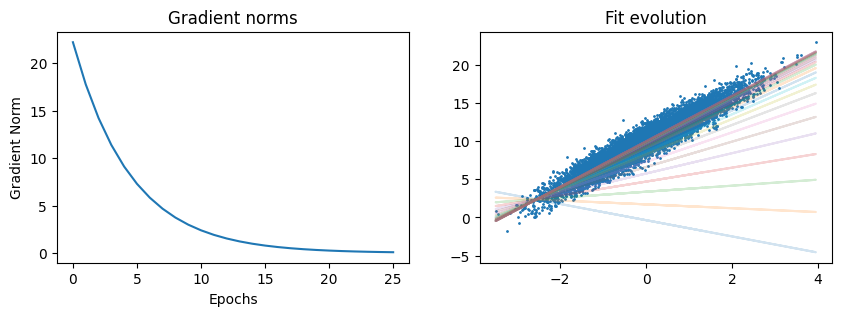

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
batch_gd.plot_norm(ax=ax[0])
batch_gd.plot_fit(X, y, ax=ax[1])
plt.show()

## Stochastic

In [7]:
# select random instance

norms = np.array([])
models: np.array = np.array([])

X_bias = np.c_[np.ones(m), X]
theta = np.random.randn(2,1)  # column vector

models = np.array([])
models = np.array([theta])

t0 = 5
t1 = 50

def learning_schadule(t):
    return t0/(t+t1)

epochs = 50
for epoch in tqdm.tqdm(range(epochs)):
    for instance in range(m):
    
        # select random instance
        instance_index = np.random.randint(m)
        X_instance = X_bias[instance_index: instance_index+1]
        y_instance = y[instance_index].reshape(1)
    
        # vectorized version of gradient calculation
        gradient =  2*(X_instance.T).dot(X_instance.dot(theta)-y_instance)  
        
        # compute gradient's norm
        norm = np.linalg.norm(gradient)
    
        
        # update parameters
        eta = learning_schadule(epoch*m + instance)
        theta = theta - eta*gradient
        
        
        
    models = np.append(models, [theta], axis=0)
    norms = np.append(norms, [norm], axis=0)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  9.87it/s]


In [8]:
theta

array([[10.0011538 ],
       [ 2.99210963]])

In [9]:
norms

array([0.41346131, 1.92776313, 0.86608764, 1.60845516, 2.55728707,
       1.56639944, 0.93848539, 4.16994242, 0.72474327, 0.59937374,
       1.15137457, 0.83069949, 1.08393797, 2.72707727, 0.00857395,
       1.49893734, 0.22574282, 0.05772734, 3.57436032, 8.21187143,
       4.35959152, 1.06233087, 2.39172219, 0.2420602 , 6.33829432,
       2.41508379, 3.35501054, 1.61027542, 2.8215968 , 2.13861023,
       2.06736813, 1.93157782, 0.72556064, 1.965608  , 0.70247376,
       2.2712577 , 0.59138627, 1.13520156, 0.30283314, 1.69798988,
       0.23681152, 1.29048772, 2.90302487, 5.73015266, 1.10094428,
       4.66725602, 4.94088417, 3.43960688, 0.39305776, 1.37345462])

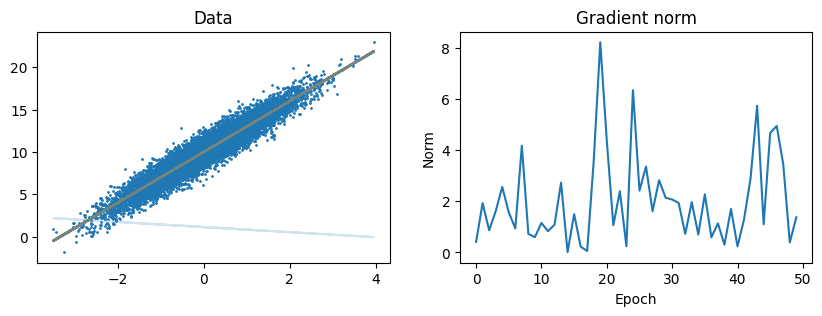

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
plt_obj = ax[0].scatter(X, y, s=1)
for model in models:
    y_pred = model[1]*X + model[0]
    ax[0].plot(X, y_pred, label=f"{model[1]}x + {model[0]}", alpha=0.2)
ax[1].plot(norms)
ax[0].set_title("Data")
ax[1].set_title("Gradient norm")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Norm")
plt.show()

## Trying SciKit Learn

In [11]:
from sklearn.linear_model import SGDRegressor

In [12]:
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01)
sgd_regressor.fit(X, y.ravel())
sgd_regressor.intercept_, sgd_regressor.coef_

(array([10.01207062]), array([3.01249731]))

## Test Generalization

In [13]:
eta = 0.01
epsilon = 0.001

batch_gd = StochasticGradientDescent(eta=eta, epsilon=epsilon, mult_method="dot-product")
batch_gd.train(X, y)

In [14]:
batch_gd.best_fit

array([[9.99956789],
       [2.99668283]])

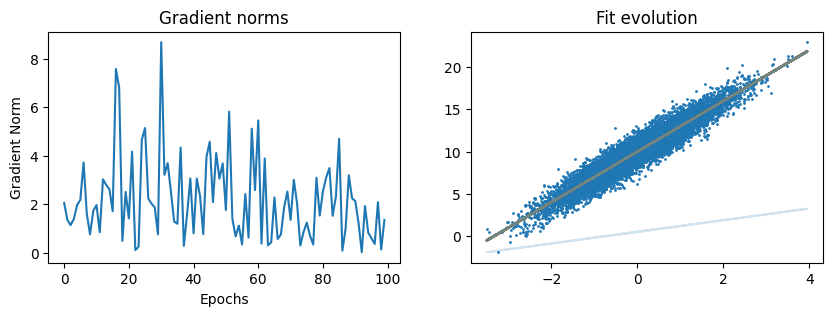

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
batch_gd.plot_norm(ax=ax[0])
batch_gd.plot_fit(X, y, ax=ax[1])
plt.show()